In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm.notebook import tqdm

In [5]:
file_name_list = os.listdir(os.path.join('data', 'ver_2'))
file_path_list = []

for file_name in file_name_list:
    file_path_list.append(os.path.join('data', 'ver_2', file_name))

In [9]:
col_name = ['pressure_1(bar)', 'main_pressure(bar)', 'venturi_pressure_1(bar)', 'venturi_pressure_2(bar)',
            'venturi_pressure_3(bar)', 'venturi_pressure_4(bar)', 'venturi_pressure_5(bar)', 'pump_speed(rpm)',
            'water_temp(c)','reserved', 'outlet_flowrate(lpm)', 'inlet_flowrate(lpm)']

In [12]:
raw_data_list = []

for file_path in tqdm(file_path_list):
    raw_data = pd.read_csv(file_path, encoding='cp949')
    data_value = raw_data.iloc[7:, :].values
    data_value = data_value.astype(np.float64)
    raw_data_list.append(pd.DataFrame(data=data_value, columns=col_name))


  0%|          | 0/84 [00:00<?, ?it/s]

<AxesSubplot:xlabel='pump_speed(rpm)', ylabel='outlet_flowrate(lpm)'>

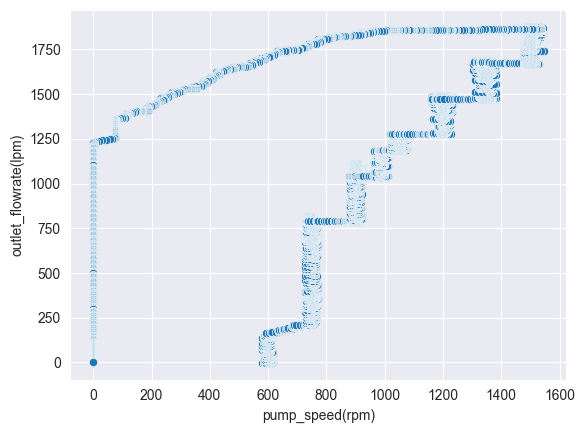

In [22]:
sns.scatterplot(x=raw_data_list[0]['pump_speed(rpm)'], y=raw_data_list[0]['outlet_flowrate(lpm)'])

In [33]:
mean_flow_list = []

for raw_data in raw_data_list:
    flow_val_1 = np.mean(raw_data[(raw_data['pump_speed(rpm)']>=880) & (raw_data['pump_speed(rpm)']<=920)]['outlet_flowrate(lpm)'])
    flow_val_2 = np.mean(raw_data[(raw_data['pump_speed(rpm)']>=1080) & (raw_data['pump_speed(rpm)']<=1220)]['outlet_flowrate(lpm)'])
    flow_val_3 = np.mean(raw_data[(raw_data['pump_speed(rpm)']>=1480) & (raw_data['pump_speed(rpm)']<=1520)]['outlet_flowrate(lpm)'])
    
    mean_flow_list.append([flow_val_1, flow_val_2, flow_val_3])

In [34]:
flow_rate_arr = np.vstack(mean_flow_list)

In [35]:
flow_rate_df = pd.DataFrame(data=flow_rate_arr, columns=['880-920', '1080-1220', '1480-1520'])
flow_rate_df.to_csv('flow_rate.csv', index=False)